In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns

#reading freesurfer results
out_dir = Path('/output')
fsdata_file = out_dir / 'freesurfer_out_preped.csv'

GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
tab_data.shape

## 1. basics: age, diagnosis
## 2. subcortical and basic segmentation 
# Basal Ganglia: Left-Caudate, Right-Caudate, Left-Pallidum, Right-Pallidum, Left-Putamen, Right-Putamen, 
#                Left-Thalamus-Proper, Right-Thalamus-Proper
# sub-cortical: SubCortGrayVol, Left-Accumbens-area, Right-Accumbens-area, Left-Amygdala, Right-Amygdala, Left-Hippocampus, Right-Hippocampus,  	
# Ventricles: CSF, Left-Lateral-Ventricle, Right-Lateral-Ventricle, 3rd-Ventricle, 4th-Ventricle, 5th-Ventricle,
#             Left-VentralDC, Left-VentralDC, (Ventral Diencephalon)
# Ventricles unknown: Left-Inf-Lat-Vent, Right-Inf-Lat-Vent, Right-VentralDC
# CC: CC_Anterior, CC_Mid_Anterior, CC_Central, CC_Mid_Posterior, CC_Posterior
# Brain-Stem: Brain-Stem, Accumbens, Left-choroid-plexus, Right-choroid-plexus,
# Cerebellum: Left-Cerebellum-Cortex, Right-Cerebellum-Cortex, Left-Cerebellum-White-Matter, Right-Cerebellum-White-Matter
# Vol sum: CortexVol, TotalGrayVolCortexVol, SubCortGrayVol, CerebralWhiteMatterVol,   
#          SupraTentorialVol, SupraTentorialVolNotVentVox, SupraTentorialVolNotVent, 
#          EstimatedTotalIntraCranialVol (eTIV), 
#          (lhCortexVol, rhCortexVol),  (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# lesion: WM-hypointensities, (Left-WM-hypointensities, Right-WM-hypointensities),
#         non-WM-hypointensities (Left-non-WM-hypointensities, Right-non-WM-hypointensities),
# others in brain: Optic-Chiasm, Left-vessel, Right-vessel,
#                  BrainSegVol, BrainSegVolNotVent, BrainSegVolNotVentSurf, BrainSegVol-to-eTIV, MaskVol-to-eTIV, 
# others non-brain:  MaskVol, SurfaceHoles, lhSurfaceHoles, rhSurfaceHoles

## White Matter in Desikan Region
# Sum: CerebralWhiteMatterVol, MaskVol, EstimatedTotalIntraCranialVol, (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# Left: wm-lh-bankssts, wm-lh-caudalanteriorcingulate, wm-lh-caudalmiddlefrontal, wm-lh-cuneus, wm-lh-entorhinal, wm-lh-fusiform,
# wm-lh-inferiorparietal, wm-lh-inferiortemporal, wm-lh-isthmuscingulate, wm-lh-lateraloccipital, wm-lh-lateralorbitofrontal, 
# wm-lh-lingual, wm-lh-medialorbitofrontal, wm-lh-middletemporal, wm-lh-parahippocampal, wm-lh-paracentral, wm-lh-parsopercularis, wm-lh-parsorbitalis
# wm-lh-parstriangularis, wm-lh-pericalcarine, wm-lh-postcentral, wm-lh-posteriorcingulate, wm-lh-precentral, wm-lh-precuneus, wm-lh-rostralanteriorcingulate
# wm-lh-rostralmiddlefrontal, wm-lh-superiorfrontal, wm-lh-superiorparietal, wm-lh-superiortemporal, wm-lh-supramarginal, wm-lh-frontalpole, 
# wm-lh-temporalpole, wm-lh-transversetemporal, wm-lh-insula, 
# Right: wm-rh-bankssts, wm-rh-caudalanteriorcingulate, wm-rh-caudalmiddlefrontal, wm-rh-cuneus, wm-rh-entorhinal, wm-rh-fusiform,
# wm-rh-inferiorparietal, wm-rh-inferiortemporal, wm-rh-isthmuscingulate, wm-rh-lateraloccipital, wm-rh-lateralorbitofrontal,
# wm-rh-lingual, wm-rh-medialorbitofrontal, wm-rh-middletemporal, wm-rh-parahippocampal, wm-rh-paracentral, wm-rh-parsopercularis, wm-rh-parsorbitalis
# wm-rh-parstriangularis, wm-rh-pericalcarine, wm-rh-postcentral, wm-rh-posteriorcingulate, wm-rh-precentral, wm-rh-precuneus, wm-rh-rostralanteriorcingulate
# wm-rh-rostralmiddlefrontal, wm-rh-superiorfrontal, wm-rh-superiorparietal, wm-rh-superiortemporal, wm-rh-supramarginal, wm-rh-frontalpole,
# wm-rh-temporalpole, wm-rh-transversetemporal, wm-rh-insula, 
# others: Left-UnsegmentedWhiteMatter, Right-UnsegmentedWhiteMatter	
    
## 3. cortical parcellation
# 


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


(114, 740)

Text(0.5, 1.05, 'Brain Structures (Ratio): cerebrum, cerebellum, subcortical and brain-stem')

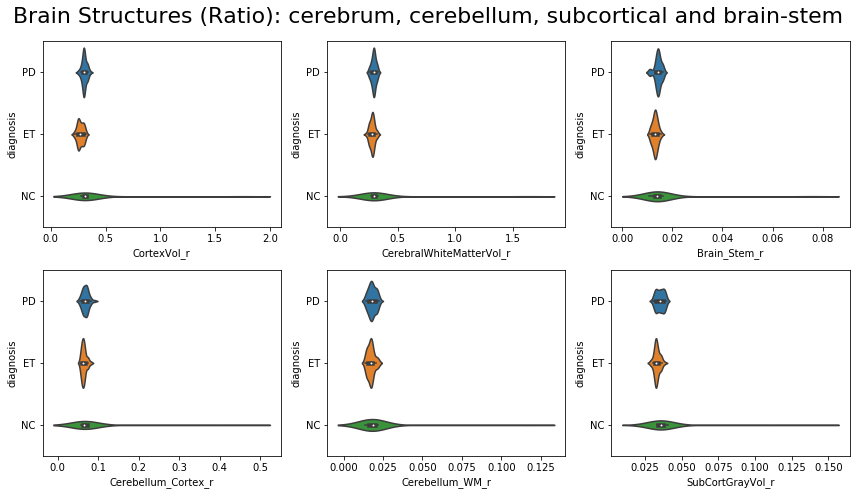

In [6]:
# distribution of large brain parts ratio
items_disp = ["diagnosis", "age", "sex", "eTIV", "CortexVol", "CerebralWhiteMatterVol",
              "Brain_Stem", "SubCortGrayVol"]
tmp_data = tab_data.copy(); 
tmp_data=tmp_data[items_disp];
tmp_data["Cerebellum_Cortex"] = tab_data["Left_Cerebellum_Cortex"]      +tab_data["Right_Cerebellum_Cortex"];
tmp_data["Cerebellum_WM"]     = tab_data["Left_Cerebellum_White_Matter"]+tab_data["Right_Cerebellum_White_Matter"];
items_disp=items_disp+["Cerebellum_Cortex", "Cerebellum_WM"]
items_disp_r = [x+"_r" for x in items_disp]
for i_feature in range(4, len(items_disp),1):
    tmp_data[items_disp_r[i_feature]] = tmp_data[items_disp[i_feature]]/tmp_data["eTIV"]
    
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1)
#
#ylim_2 = [300000, 600000]
sns.violinplot(y="diagnosis", x=items_disp_r[4], data=tmp_data, orient = 'h', inner='box', ax=axs[0, 0]); #axs[0,1].set_ylim(ylim_2);
#ylim_3 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp_r[5], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 1]); #axs[1,0].set_ylim(ylim_3);
#ylim_4 = [10000, 35000];
sns.violinplot(y="diagnosis", x=items_disp_r[6], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 2]); #axs[1,1].set_ylim(ylim_2);
#ylim_5 = [30000, 80000];
sns.violinplot(y="diagnosis", x=items_disp_r[7], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 2]); #axs[2,0].set_ylim(ylim_3);
#ylim_6 = [70000, 140000];
sns.violinplot(y="diagnosis", x=items_disp_r[8], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 0]); #axs[2,1].set_ylim(ylim_3);
#ylim_4 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp_r[9], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 1]); #axs[3,0].set_ylim(ylim_4);
fig.suptitle('Brain Structures (Ratio): cerebrum, cerebellum, subcortical and brain-stem', fontsize=22, x=0.5, y=1.05)
#
#plt.savefig('ad_group_corr_ic0.png')

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.05, 'Brain Structures: cerebrum, cerebellum, subcortical and brain-stem')

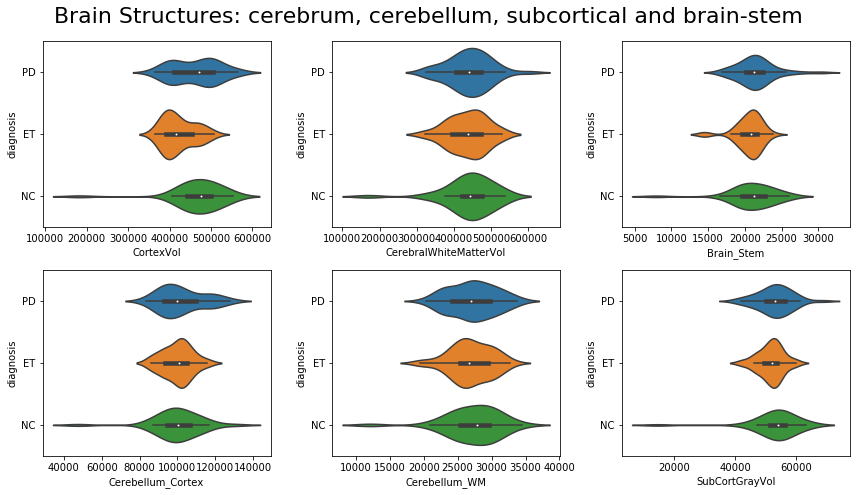

In [11]:
# distribution of large brain parts
items_disp = ["diagnosis", "age", "sex", "eTIV", "CortexVol", "CerebralWhiteMatterVol",
              "Brain_Stem", "SubCortGrayVol"]
tmp_data = tab_data[items_disp]; 
tmp_data["Cerebellum_Cortex"] = tab_data["Left_Cerebellum_Cortex"]      +tab_data["Right_Cerebellum_Cortex"];
tmp_data["Cerebellum_WM"]     = tab_data["Left_Cerebellum_White_Matter"]+tab_data["Right_Cerebellum_White_Matter"];
items_disp=items_disp+["Cerebellum_Cortex", "Cerebellum_WM"]

from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1)
#
#ylim_2 = [300000, 600000]
sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h', inner='box', ax=axs[0, 0]); #axs[0,1].set_ylim(ylim_2);
#ylim_3 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 1]); #axs[1,0].set_ylim(ylim_3);
#ylim_4 = [10000, 35000];
sns.violinplot(y="diagnosis", x=items_disp[6], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 2]); #axs[1,1].set_ylim(ylim_2);
#ylim_5 = [30000, 80000];
sns.violinplot(y="diagnosis", x=items_disp[7], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 2]); #axs[2,0].set_ylim(ylim_3);
#ylim_6 = [70000, 140000];
sns.violinplot(y="diagnosis", x=items_disp[8], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 0]); #axs[2,1].set_ylim(ylim_3);
#ylim_4 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[9], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 1]); #axs[3,0].set_ylim(ylim_4);
fig.suptitle('Brain Structures: cerebrum, cerebellum, subcortical and brain-stem', fontsize=22, x=0.5, y=1.05)
#
#plt.savefig('ad_group_corr_ic0.png')

Text(0.5, 1.02, 'Basal Ganglia Ratio: Caudate, Pallidum, Putamen, Thalamus')

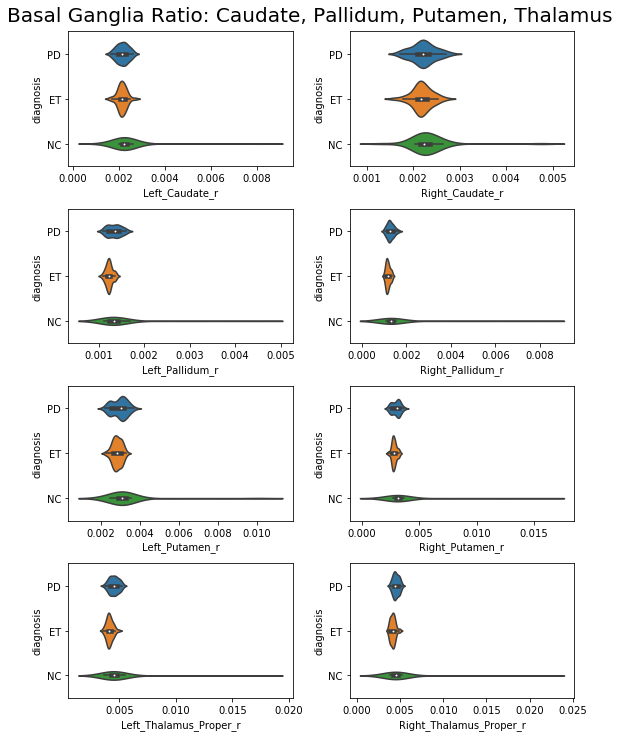

In [14]:
# distribution of basal ganglia
items_disp = ["diagnosis", "age", "sex", "eTIV", "Left_Caudate", "Right_Caudate",  'Left_Pallidum', 'Right_Pallidum', 
              'Left_Putamen', 'Right_Putamen', 'Left_Thalamus_Proper', 'Right_Thalamus_Proper']
tmp_data = tab_data.copy(); 
tmp_data=tmp_data[items_disp];
tmp_data["Caudate"]  = tab_data["Left_Caudate"] + tab_data["Right_Caudate"];
tmp_data["Pallidum"] = tab_data["Left_Pallidum"]+ tab_data["Right_Pallidum"];
tmp_data["Putamen"]  = tab_data["Left_Putamen"]+ tab_data["Right_Putamen"];
tmp_data["Thalamus_Proper"] = tab_data["Left_Thalamus_Proper"]+ tab_data["Right_Thalamus_Proper"];
items_disp_r = items_disp + ["Caudate", "Pallidum", "Thalamus_Proper", "Thalamus_Proper"]
items_disp_r = [x+"_r" for x in items_disp_r]
for i_feature in range(4, len(items_disp),1):
    tmp_data[items_disp_r[i_feature]] = tmp_data[items_disp[i_feature]]/tmp_data["eTIV"]
    
# SubCortGrayVol, Brain-Stem, Accumbens, CortexVol, TotalGrayVolCortexVol, CerebralWhiteMatterVol, EstimatedTotalIntraCranialVol
#
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(8,10), tight_layout=1)
#
#ylim_1 = [1200,5500];
sns.violinplot(y="diagnosis", x=items_disp_r[4], data=tmp_data, orient='h', inner='box', ax=axs[0,0]); #axs[0,0].set_xlim(ylim_1);
sns.violinplot(y="diagnosis", x=items_disp_r[5], data=tmp_data, orient='h', inner='box', ax=axs[0,1]); #axs[0,1].set_xlim(ylim_1);
#ylim_2 = [1000,3500];
sns.violinplot(y="diagnosis", x=items_disp_r[6], data=tmp_data, orient='h', inner='box', ax= axs[1,0]); #axs[1,0].set_xlim(ylim_2);
sns.violinplot(y="diagnosis", x=items_disp_r[7], data=tmp_data, orient='h', inner='box', ax= axs[1,1]); #axs[1,1].set_xlim(ylim_2);
#ylim_3 = [2000,7500];
sns.violinplot(y="diagnosis", x=items_disp_r[8], data=tmp_data, orient='h', inner='box', ax= axs[2,0]); #axs[2,0].set_xlim(ylim_3);
sns.violinplot(y="diagnosis", x=items_disp_r[9], data=tmp_data, orient='h', inner='box', ax= axs[2,1]); #axs[2,1].set_xlim(ylim_3);
#ylim_4 = [2000,10000];
sns.violinplot(y="diagnosis", x=items_disp_r[10], data=tmp_data, orient='h', inner='box', ax= axs[3,0]); #axs[3,0].set_xlim(ylim_4);
sns.violinplot(y="diagnosis", x=items_disp_r[11], data=tmp_data, orient='h', inner='box', ax= axs[3,1]); #axs[3,1].set_xlim(ylim_4);
fig.suptitle('Basal Ganglia Ratio: Caudate, Pallidum, Putamen, Thalamus', fontsize = 20, x=0.5, y=1.02)
#axs[1].alpha=0.3
#plt.savefig('ad_group_corr_ic0.png')

Text(0.5, 1.02, 'Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus')

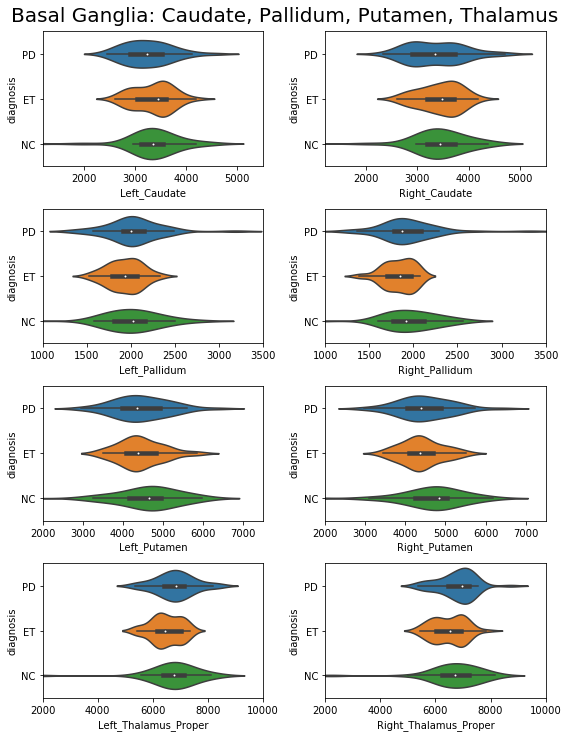

In [15]:
# distribution of basal ganglia
class_a1 = "Left_Caudate";  class_b1 = 'Left_Pallidum';  class_c1 = 'Left_Putamen';  class_d1 = 'Left_Thalamus_Proper';
class_a2 = "Right_Caudate"; class_b2 = 'Right_Pallidum'; class_c2 = 'Right_Putamen'; class_d2 = 'Right_Thalamus_Proper';
# SubCortGrayVol, Brain-Stem, Accumbens, CortexVol, TotalGrayVolCortexVol, CerebralWhiteMatterVol, EstimatedTotalIntraCranialVol


from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(8,10), tight_layout=1)
#
ylim_1 = [1200,5500];
sns.violinplot(y="diagnosis", x=class_a1, data=tab_data, orient='h', inner='box', ax=axs[0,0]);  axs[0,0].set_xlim(ylim_1);
sns.violinplot(y="diagnosis", x=class_a2, data=tab_data, orient='h', inner='box', ax=axs[0,1]); axs[0,1].set_xlim(ylim_1);
ylim_2 = [1000,3500];
sns.violinplot(y="diagnosis", x=class_b1, data=tab_data, orient='h', inner='box', ax= axs[1,0]); axs[1,0].set_xlim(ylim_2);
sns.violinplot(y="diagnosis", x=class_b2, data=tab_data, orient='h', inner='box', ax= axs[1,1]); axs[1,1].set_xlim(ylim_2);
ylim_3 = [2000,7500];
sns.violinplot(y="diagnosis", x=class_c1, data=tab_data, orient='h', inner='box', ax= axs[2,0]); axs[2,0].set_xlim(ylim_3);
sns.violinplot(y="diagnosis", x=class_c2, data=tab_data, orient='h', inner='box', ax= axs[2,1]); axs[2,1].set_xlim(ylim_3);
ylim_4 = [2000,10000];
sns.violinplot(y="diagnosis", x=class_d1, data=tab_data, orient='h', inner='box', ax= axs[3,0]); axs[3,0].set_xlim(ylim_4);
sns.violinplot(y="diagnosis", x=class_d2, data=tab_data, orient='h', inner='box', ax= axs[3,1]); axs[3,1].set_xlim(ylim_4);
fig.suptitle('Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus', fontsize = 20, x=0.5, y=1.02)
#axs[1].alpha=0.3
#plt.savefig('ad_group_corr_ic0.png')

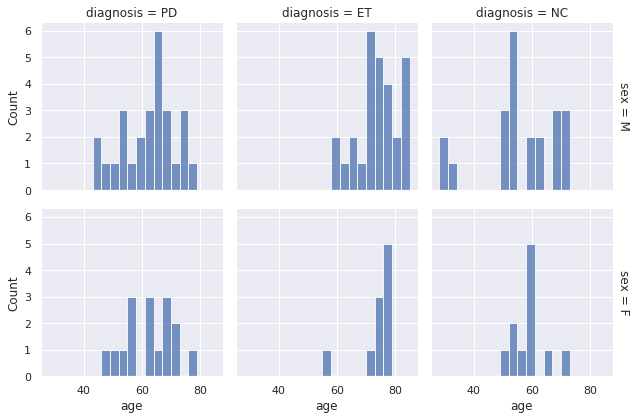

In [17]:
# test plots
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(
    tab_data, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

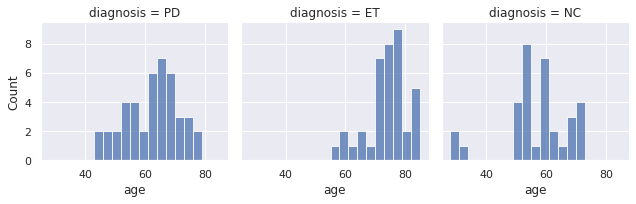

In [19]:
# plot tmp27 distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    tab_data, x="age", col="diagnosis",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.625      0.625      0.625      0.5        0.5        0.5
 0.57142857 0.57142857 0.57142857 0.57142857] [0.5        0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.42857143 0.42857143] [0.55555556 0.625      0.625      0.5        0.5        0.5
 0.5        0.5        0.5        0.5       ]


Text(0.5, 0, 'Validations')

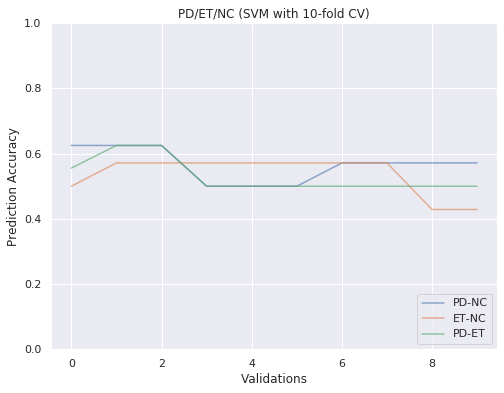

In [21]:
# prediciton with all freesurfer output features
# read corr data and function init
import numpy as np
def get_group(df, groups):
    res = df[(df["diagnosis"]==groups[0]) | (df["diagnosis"]==groups[1])];
    res['y'] = [1 if x == groups[0] else 0 for x in res['diagnosis']]
    res.drop(['diagnosis'], axis=1, inplace=True);
    res['sex'] = [1 if x == 'M' else 0 for x in res['sex'] ]
    return res
def cv_score(X, N_cv):
    from sklearn import svm
    from sklearn.model_selection import cross_val_score
    y = X['y'];
    data=X.drop(['y'], axis=1);
    clf = svm.SVC(kernel='sigmoid', C=1)
    scores = cross_val_score(clf, np.array(data), np.array(y), cv=N_cv)
    m_list= scores;
    return m_list

N_cv=10
# AD-IC ic in PD/NC in both datasets
#import matplotlib.pyplot as plt
pd_nc_data = get_group(tab_data, ["PD", "NC"])
et_nc_data = get_group(tab_data, ["ET", "NC"])
pd_et_data = get_group(tab_data, ["PD", "ET"])
res1 = cv_score(pd_nc_data, N_cv)
res2 = cv_score(et_nc_data, N_cv)
res3 = cv_score(pd_et_data, N_cv)
print(res1, res2, res3)
fig = plt.figure(figsize=[8, 6])
plt.plot(res1, alpha=.6, label='PD-NC')
plt.plot(res2, alpha=.6, label='ET-NC')
plt.plot(res3, alpha=.6, label='PD-ET')
plt.legend(loc='lower right')
plt.title('PD/ET/NC (SVM with 10-fold CV)')
plt.ylim(0, 1)
plt.ylabel("Prediction Accuracy")
plt.xlabel("Validations")
#  PD/NC: array([0.5, 0.5, 0.5, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857])
# PD/ET: 0.5714285714285714,  0.6666666666666666

In [ ]:
# distribution of large brain parts ratio
def lr_ratio(data, items_basic, items_single, items_lr):
    item_left   = [ "Left_"+x  for x in items_lr];
    item_right  = [ "Right_"+x for x in items_lr];
    items_all = items_single + item_left + item_right + items_lr;
    tmp_data = data[items_basic+items_single+item_left+item_right];
    for x in items_lr:
        tmp_data[x]  = tmp_data["Left_"+x] + tmp_data["Right_"+x]
    for x in items_all:
        tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"]  
    return tmp_data, items_basic+items_all

def plot_6(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def plot_6sex(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   hue="sex",split=True, inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   hue="sex",  split=True, inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))

In [ ]:
# "Hippocampus", "Amygdala", "Accumbens-area"
from matplotlib import pyplot as plt
import seaborn as sns
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_disp  = ["Hippocampus", "Amygdala", "Accumbens_area"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, [],items_disp);
print(items_all)
plot_6sex(tmp_data, items_disp+[x+"_r" for x in items_disp], "sex_"+" ".join(items_disp), 1)
plot_6(tmp_data, items_disp+[x+"_r" for x in items_disp], " ".join(items_disp), 1)

In [ ]:
# "Caudate", "Pallidum", "Putamen"
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_disp  = ["Caudate", "Pallidum", "Putamen"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, [],items_disp);
print(items_all)
plot_6(tmp_data, items_disp+[x+"_r" for x in items_disp], "_".join(items_disp), 1)
plot_6sex(tmp_data, items_disp+[x+"_r" for x in items_disp],"sex_"+"_".join(items_disp), 1)

In [ ]:
# Ventricle System, Left-Inf-Lat-Vent, 
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["3rd-Ventricle", "4th-Ventricle", "5th-Ventricle", "CSF"];
items_lr  = ["Lateral-Ventricle", "Inf-Lat-Vent"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
print(items_all)
plot_6sex(tmp_data, items_single+items_lr+[x+"_r" for x in items_lr], "sex_Ventricle System", 1)
plot_6(tmp_data, items_single+items_lr+[x+"_r" for x in items_lr], "Ventricle System", 1)

In [ ]:
# Corpus Callosum
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CC_Anterior", "CC_Mid_Anterior", "CC_Central",
                 "CC_Mid_Posterior" ,"CC_Posterior", "CC_sum"];
#items_lr  = ["Thalamus-Proper"];
#lr_ratio(data, items_basic, items_single, items_lr)
#tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
tmp_data = tab_data
tmp_data[items_single[-1]] = tmp_data[items_single[0]]+tmp_data[items_single[1]]+tmp_data[items_single[2]]+tmp_data[items_single[3]]+tmp_data[items_single[4]]
print(items_all)
plot_6sex(tmp_data, items_single, "sex_Corpus Callosum", 1)
plot_6(tmp_data, items_single, "Corpus Callosum", 1)

In [ ]:
# Corpus Callosum Ratio
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CC_Anterior", "CC_Mid_Anterior", "CC_Central",
                 "CC_Mid_Posterior" ,"CC_Posterior", "CC_sum"];
#items_lr  = ["Thalamus-Proper"];
#lr_ratio(data, items_basic, items_single, items_lr)
#tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
tmp_data = tab_data
tmp_data[items_single[-1]] = tmp_data[items_single[0]]+tmp_data[items_single[1]]+tmp_data[items_single[2]]+tmp_data[items_single[3]]+tmp_data[items_single[4]]
for x in items_single:
    tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"] 
print(items_all)
plot_6sex(tmp_data, [x+"_r" for x in items_single], "sex_Corpus Callosum (Ratio)", 1)
plot_6(tmp_data, [x+"_r" for x in items_single], "Corpus Callosum (Ratio)", 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'CortexVol', 'Brain-Stem', 'Left-Cerebellum-Cortex', 'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex', 'Cerebellum-White-Matter']


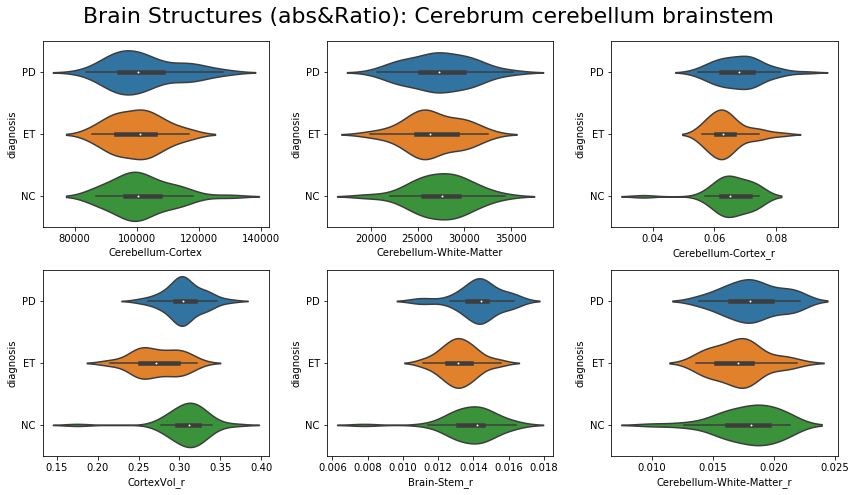

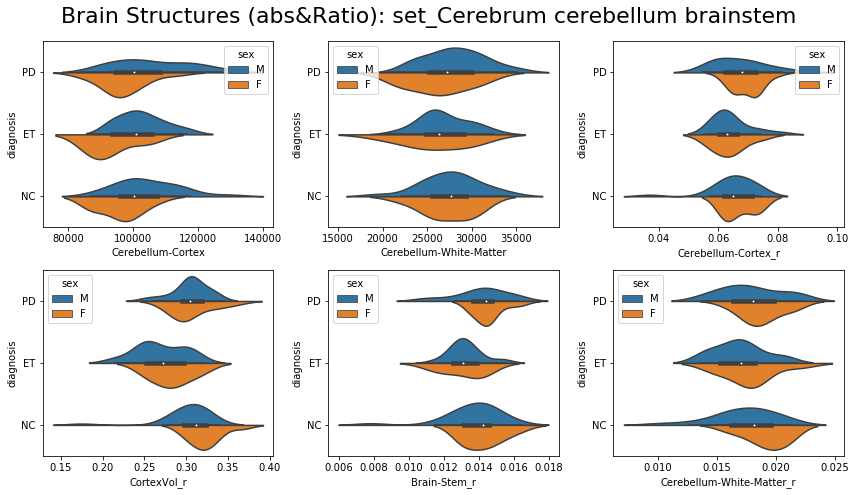

In [146]:
# Cerebrum cerebellum brainstem
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CortexVol", "Brain-Stem"];
items_lr  = ["Cerebellum-Cortex", "Cerebellum-White-Matter"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
#tmp_data = tab_data
print(items_all)
plot_6(tmp_data, items_lr+[x+"_r" for x in items_lr+items_single],
       "Cerebrum cerebellum brainstem", 1)
plot_6sex(tmp_data, items_lr+[x+"_r" for x in items_lr+items_single],
       "set_Cerebrum cerebellum brainstem", 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'SubCortGrayVol', 'SupraTentorialVol', 'Left-Thalamus-Proper', 'Left-VentralDC', 'Right-Thalamus-Proper', 'Right-VentralDC', 'Thalamus-Proper', 'VentralDC']


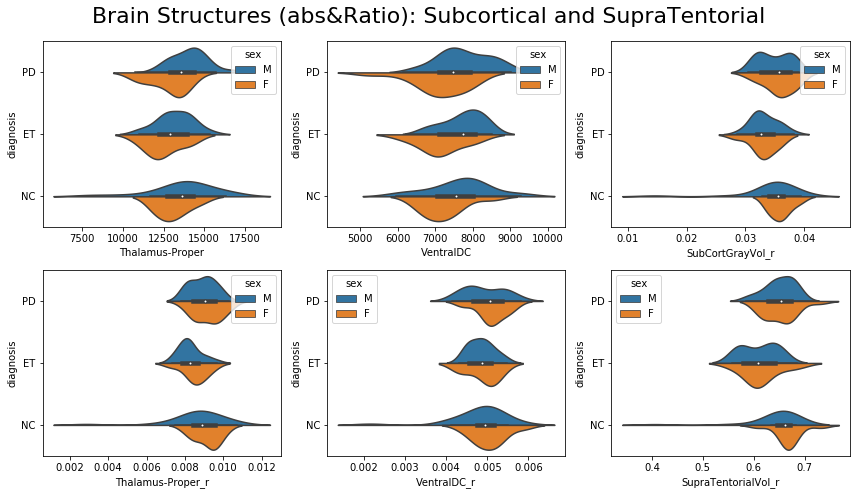

In [138]:
# Subcortical and SupraTentorial
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["SubCortGrayVol", "SupraTentorialVol"];
items_lr  = ["Thalamus-Proper", "VentralDC"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
#tmp_data = tab_data
print(items_all)
plot_6(tmp_data, items_lr+[x+"_r" for x in items_single+items_lr], "Subcortical and SupraTentorial", 1)